## Loading Data

In [4]:
import pandas as pd
import numpy as np
import os

#Import data into df
df = pd.read_csv('data/investments_VC.csv', encoding='ISO-8859-1')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [6]:
df.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [7]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [8]:
df.shape

(54294, 39)

In [9]:
#Determine number of missing values
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

Permalink is unique identifier for each company.

## Cleaning data
### Credit to PRIANKA BALL for this first cell: https://www.kaggle.com/code/pball01/predicting-startup-success

In [10]:
# some of the columns have space in front. Removing spaces from the front.
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','') # removing commas from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')#removing extra space from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0') #removing - from funding_total_usd column and replacing with 0


df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])# turning column to number


#turning all date columns in to date
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce') # conveting column into date and ignoring errors
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce') # conveting column into date and ignoring errors
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce') # conveting column into date and ignoring errors

#Replacing missing status with "unknown"
df['status'] = df['status'].replace(np.nan,"unknown")
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df = df.drop_duplicates() # dropping duplicates
#Set status to na if 'unknown'
df['status'] = df['status'].replace("unknown", np.nan)
df = df.dropna(subset=['permalink', 'status', 'name'])
df.shape

(48123, 39)

In [12]:
#Replace '/organization/' with '/company/' in permalink
df['permalink'] = df['permalink'].str.replace('/organization/', '/company/')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/company/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/company/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/company/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/company/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/company/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA

Given that my ultimate goal is to predict the 'status' of startups, it's crucial to understand the distribution of the target variable ('status'). I will start by exploring the distribution of the 'status' column. This will help us understand the balance (or imbalance) of our classes.

In [13]:
#Calculate % of missing values for each column
#Sort the values in descending order
df.isnull().mean().sort_values(ascending=False)


state_code              0.385949
founded_month           0.219438
founded_year            0.219438
founded_quarter         0.219438
founded_at              0.217962
city                    0.121688
country_code            0.105272
region                  0.105272
market                  0.074580
category_list           0.074434
homepage_url            0.070174
first_funding_at        0.000208
last_funding_at         0.000125
secondary_market        0.000000
round_C                 0.000000
post_ipo_debt           0.000000
product_crowdfunding    0.000000
round_A                 0.000000
round_B                 0.000000
permalink               0.000000
round_D                 0.000000
private_equity          0.000000
round_E                 0.000000
round_F                 0.000000
round_G                 0.000000
post_ipo_equity         0.000000
venture                 0.000000
grant                   0.000000
angel                   0.000000
debt_financing          0.000000
convertibl

In [14]:
#Determine all the values present in 'status' column
df['status'].unique()


array(['acquired', 'operating', 'closed'], dtype=object)

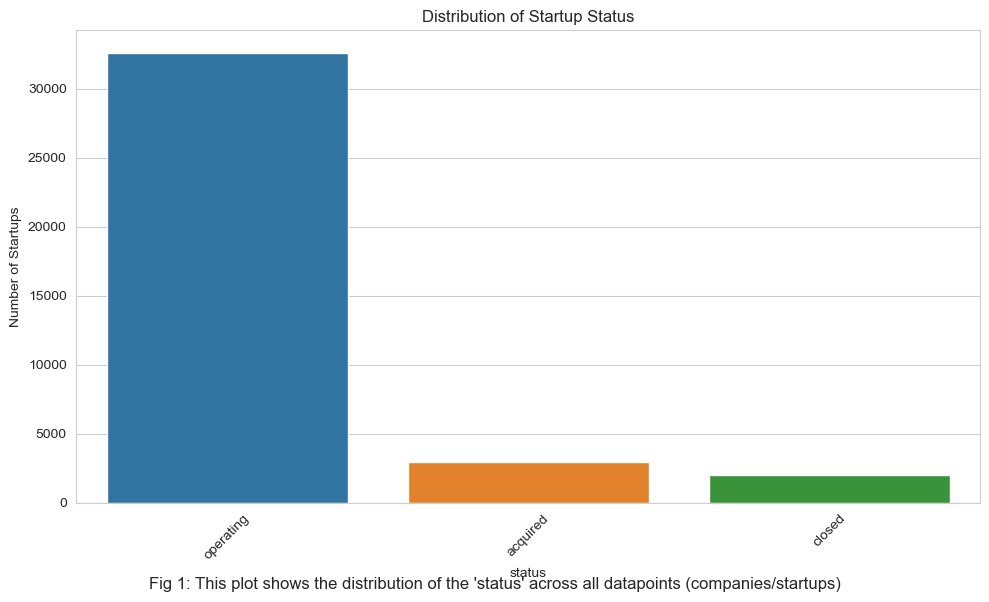

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

# Plotting the distribution of the 'status' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
plt.title("Distribution of Startup Status")
plt.ylabel("Number of Startups")
#Caption
plt.figtext(0.5, 0.01, "Fig 1: This plot shows the distribution of the 'status' across all datapoints (companies/startups)", wrap=True, horizontalalignment='center', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Startup_Status.png')
plt.savefig(plot_filename)
plt.show()
plt.close()



In [16]:
# Distribution of the target variable 'status'
status_distribution = df['status'].value_counts(normalize=True) * 100

status_distribution

status
operating    86.921015
acquired      7.672007
closed        5.406978
Name: proportion, dtype: float64

Reveals heavy distribution imbalance.

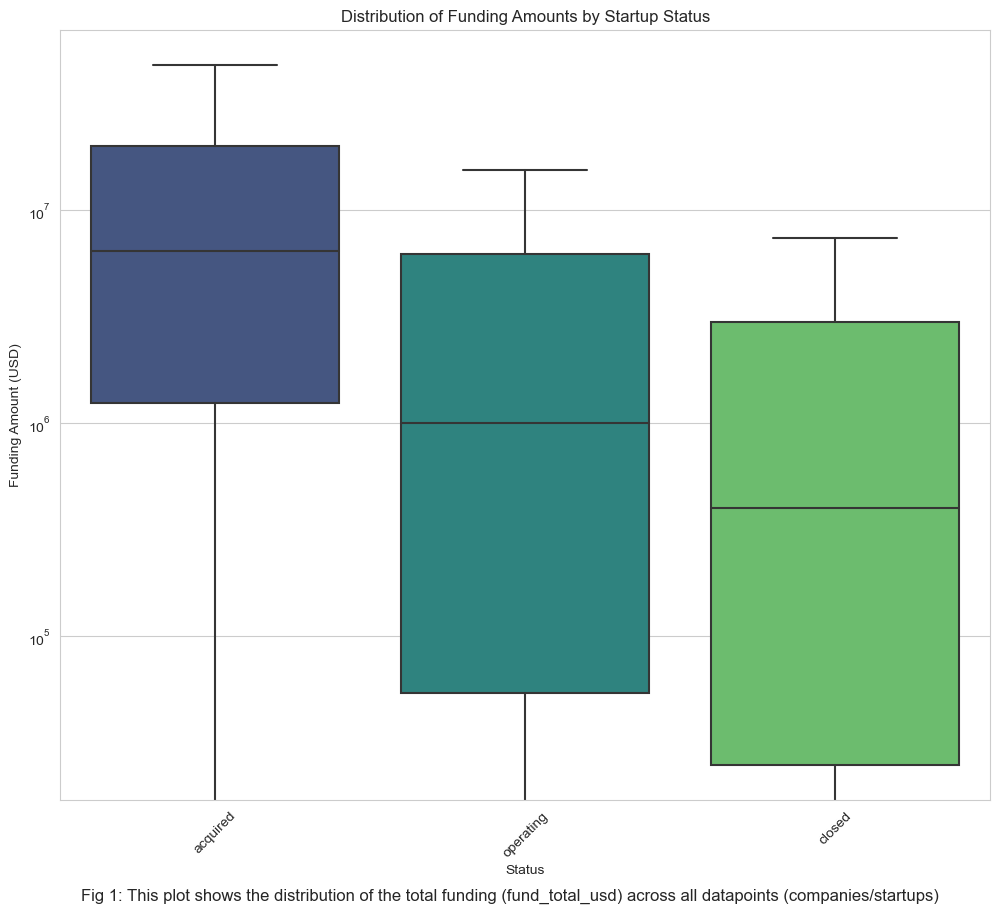

In [37]:
# Plotting the distribution of funding amounts across different startup statuses again
plt.figure(figsize=(12, 10))
sns.boxplot(x="status", y="funding_total_usd", data=df, palette="viridis", showfliers=False)  # Excluding outliers for better visualization
plt.title('Distribution of Funding Amounts by Startup Status')
plt.xlabel('Status')
plt.ylabel('Funding Amount (USD)')
plt.xticks(rotation=45)
plt.figtext(0.5, 0.01, "Fig 2: This plot shows the distribution of the total funding (fund_total_usd) across all datapoints (companies/startups)", wrap=True, horizontalalignment='center', fontsize=12)
plt.yscale("log")  # Using a logarithmic scale for better visualization of differences
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Funding_Amounts_by_Startup_Status.png')
plt.savefig(plot_filename)
plt.show()
plt.close()


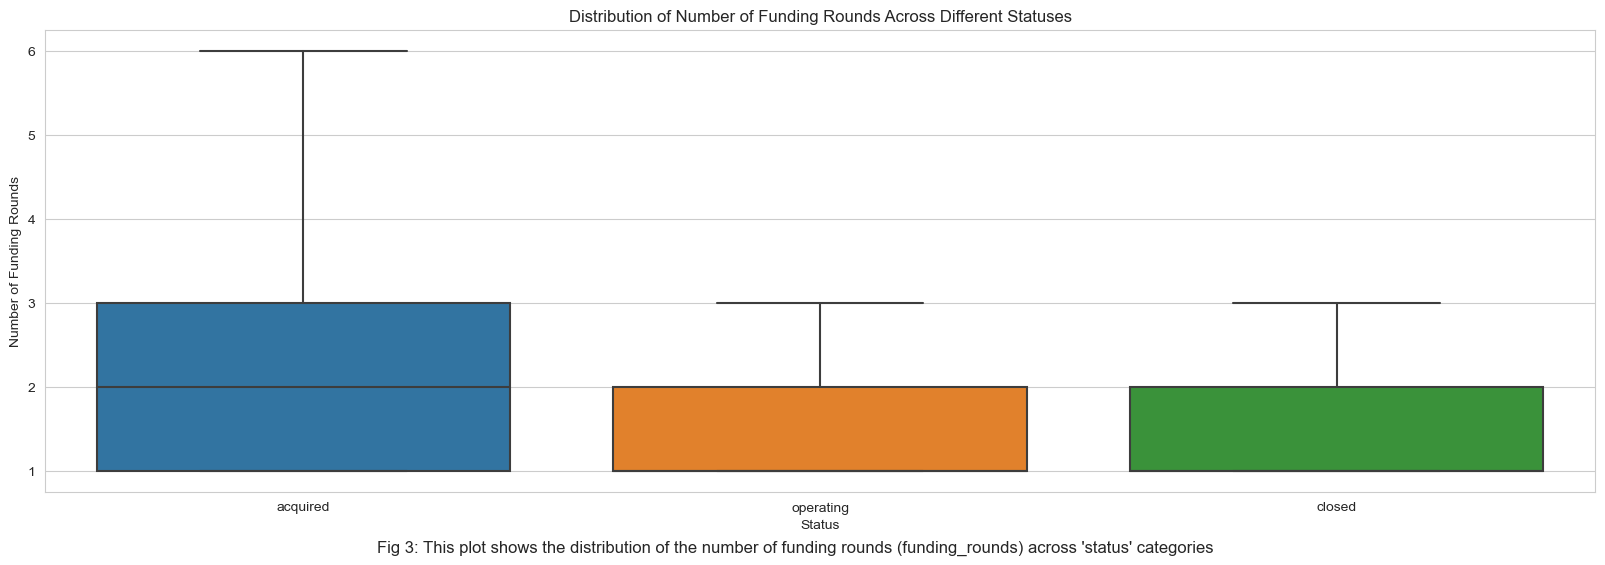

In [50]:
# Plot the distribution of the number of funding rounds across different statuses
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='status', y='funding_rounds', showfliers=False)  # Excluding outliers for clarity
plt.title('Distribution of Number of Funding Rounds Across Different Statuses')
plt.ylabel('Number of Funding Rounds')
plt.figtext(0.5, 0.01, "Fig 3: This plot shows the distribution of the number of funding rounds (funding_rounds) across 'status' categories", wrap=True, horizontalalignment='center', fontsize=12)
plt.xlabel('Status')
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Number_of_Funding_Rounds_Acrosss_Statuses.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

Reveals: Companies that are aquired tend to have higher funding across a very wide range of values (wide confidence interval). Intuitively, startups with higher funding amounts have a higher probability of being aquired. Similarly, companies that are aquired tend to have more funding rounds.

In [116]:
# Plotting the distribution of startups across different markets (top 15 markets for better visualization)
plt.figure(figsize=(14, 10))
sns.countplot(data=df, y='market', order=df['market'].value_counts().head(15).index)
plt.title("Distribution of Startups Across Different Markets (Top 15)")
plt.xlabel("Number of Startups")
plt.figtext(0.5, 0.01, "Fig 4: This plot shows the distribution of datapoints (companies/startups) across 'market' categories", wrap=True, horizontalalignment='center', fontsize=12)
plt.ylabel("Market")
plt.tight_layout()
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Startups_Across_Markets.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

KeyError: 'market'

<Figure size 1400x1000 with 0 Axes>

Reveals that most startups represented in the data are in the software and biotech space.

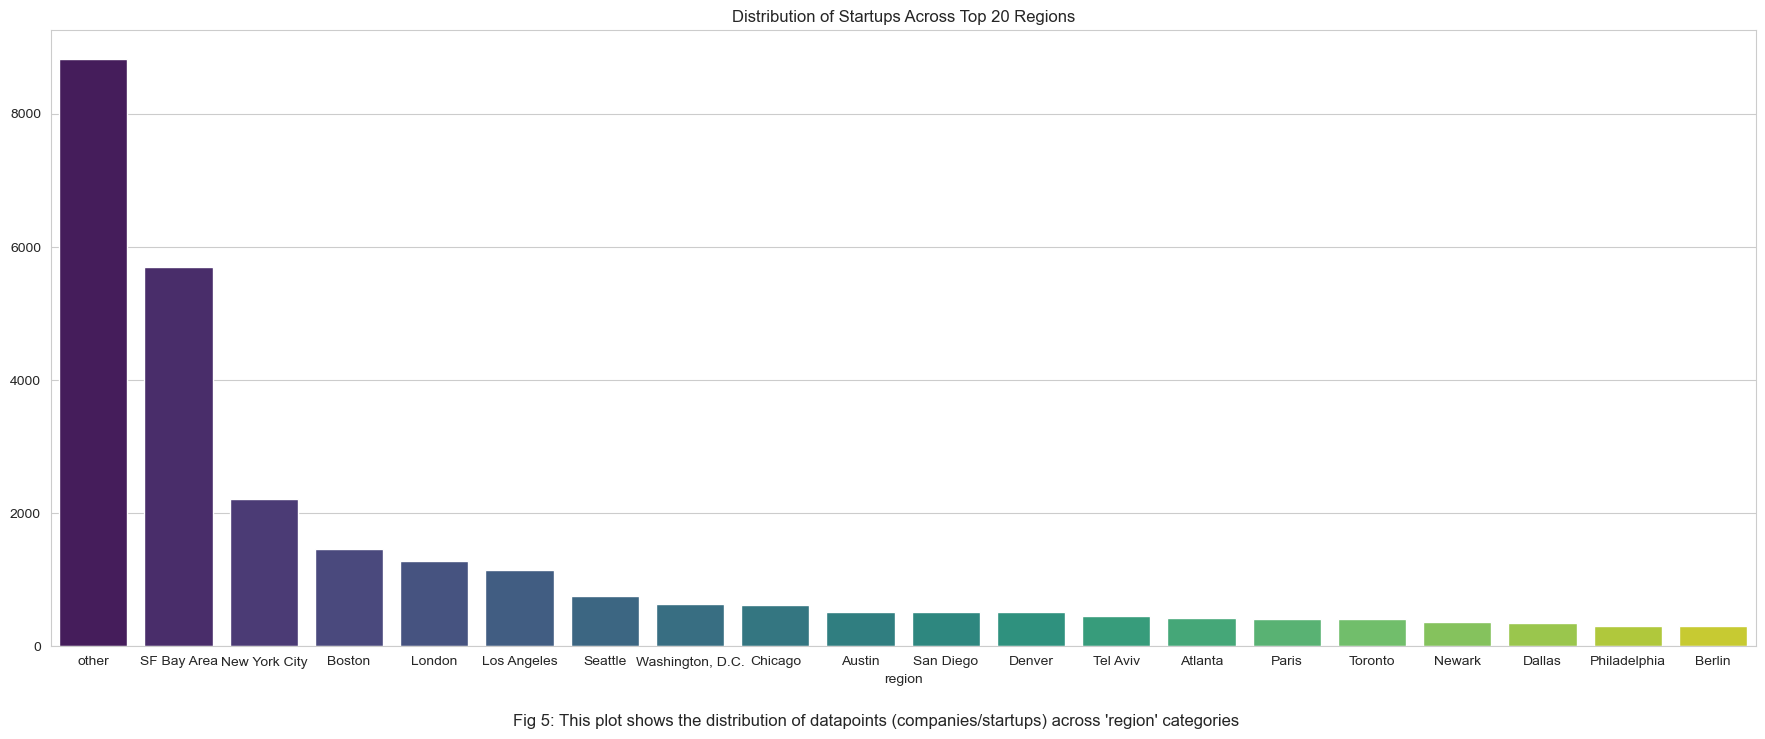

In [115]:
# Distribution of startups across different regions
region_counts = df['region'].value_counts().nlargest(20)  # Considering top 20 regions for clarity

# Plotting the distribution of startups across regions
plt.figure(figsize=(22, 8))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('Distribution of Startups Across Top 20 Regions')
plt.figtext(0.5, 0.01, "Fig 5: This plot shows the distribution of datapoints (companies/startups) across 'region' categories", wrap=True, horizontalalignment='center', fontsize=12)
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Startups_Across_Regions.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

This figure reveals that SF Bay Area has the highest number of startups, followed by New York City and Boston.

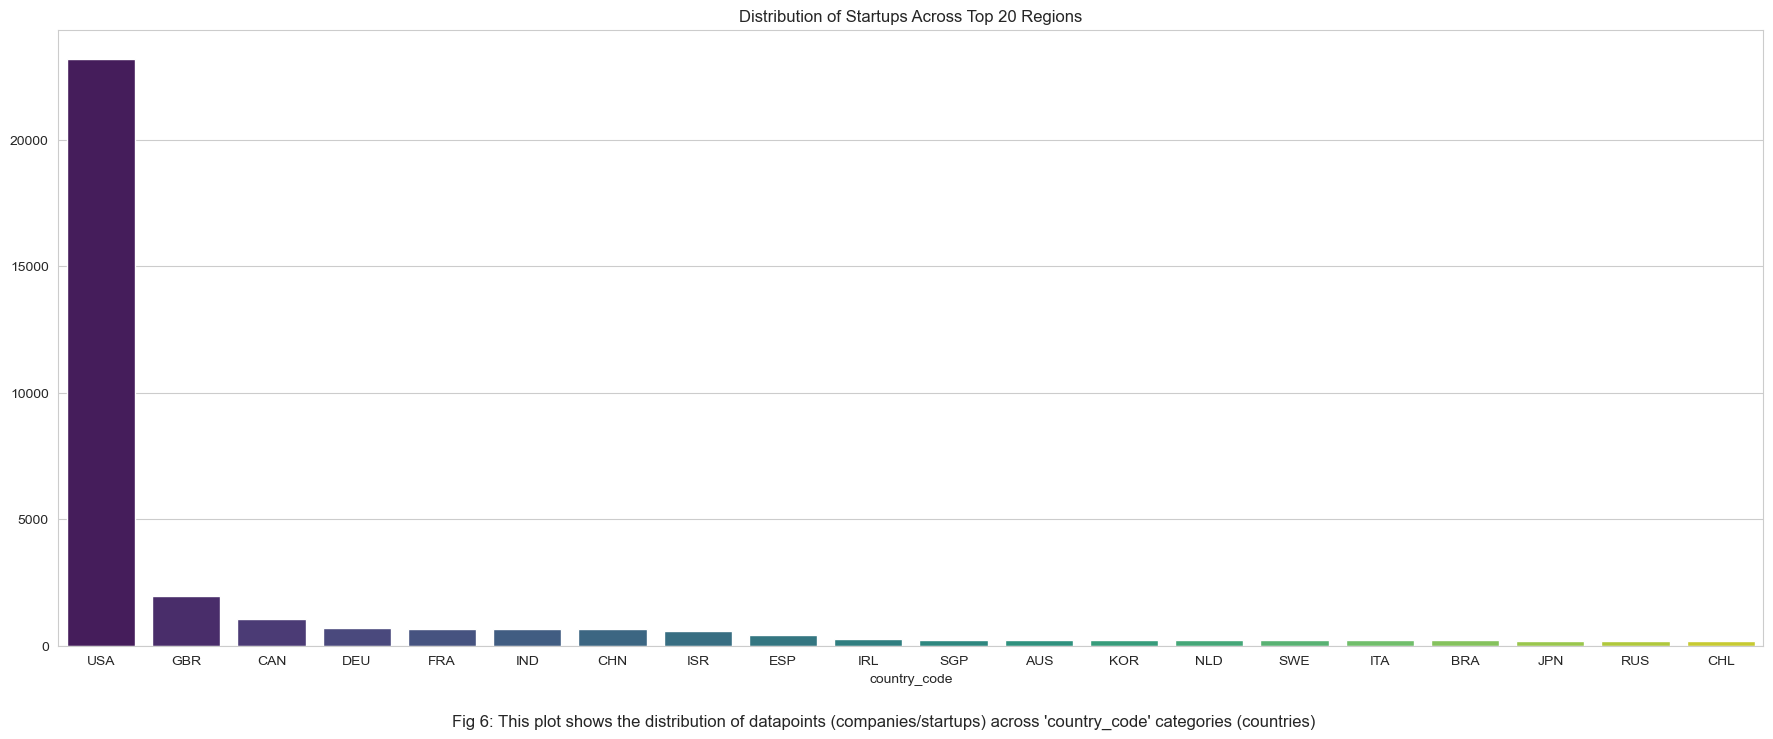

In [55]:
# Distribution of startups across different countries
# Considering top 20 countries for clarity
country_counts = df['country_code'].value_counts().nlargest(20)

# Plotting the distribution of startups across regions
plt.figure(figsize=(22, 8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.figtext(0.5, 0.01, "Fig 6: This plot shows the distribution of datapoints (companies/startups) across 'country_code' categories (countries)", wrap=True, horizontalalignment='center', fontsize=12)
plt.title('Distribution of Startups Across Top 20 Regions')
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Startups_Across_Countries.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

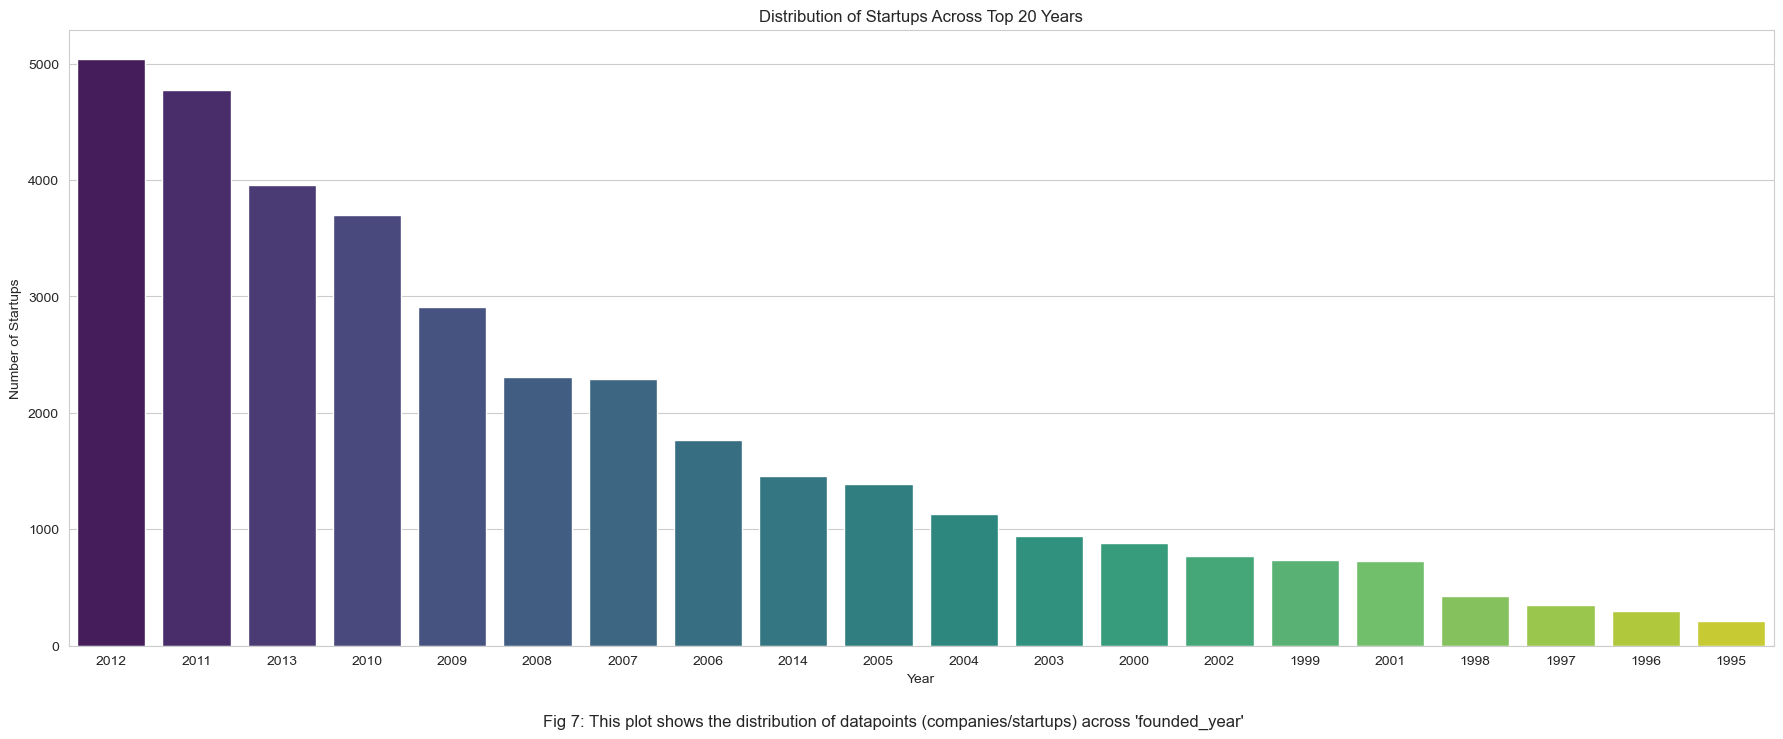

In [60]:
# Drop everything after first '-' in the date column and put in temp df
df['founded_year'] = df['founded_year'].astype(str).str.split('-').str[0]
df= df[df['founded_year'] != 'NaT']

#Distribution of startups across different years
year_counts = df['founded_year'].value_counts().nlargest(20)  # Considering top 20 years for clarity

# Plotting the distribution of startups across years
plt.figure(figsize=(22, 8))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title('Distribution of Startups Across Top 20 Years')
plt.ylabel('Number of Startups')
plt.xlabel('Year')
plt.figtext(0.5, 0.01, "Fig 7: This plot shows the distribution of datapoints (companies/startups) across 'founded_year'", wrap=True, horizontalalignment='center', fontsize=12)

if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Startups_Across_Year.png')
plt.savefig(plot_filename)
plt.show()
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


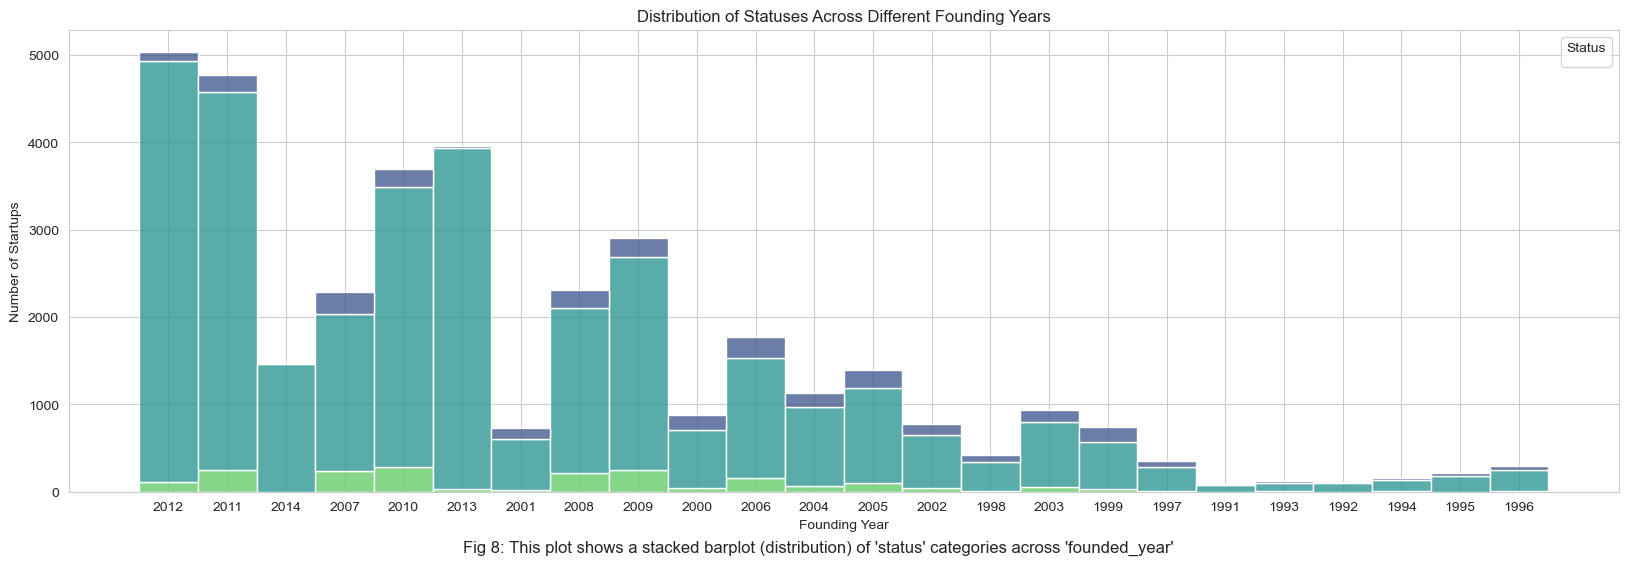

In [61]:
# Plot the distribution of the founding year across different statuses
#TODO Standardize the number of startups in each year on 0 to 100 scale
plt.figure(figsize=(20, 6))
#Limit years to after 1960
df_temp = df[df['founded_year'] > '1990']
#Remove values = string 'NaT' from year column
df_temp = df_temp[df_temp['founded_year'] != 'NaT']

sns.histplot(data=df_temp, x='founded_year', hue='status', bins=30, multiple="stack", palette="viridis")
plt.title('Distribution of Statuses Across Different Founding Years')
plt.ylabel('Number of Startups')
plt.xlabel('Founding Year')
plt.legend(title='Status')
plt.figtext(0.5, 0.01, "Fig 8: This plot shows a stacked barplot (distribution) of 'status' categories across 'founded_year'", wrap=True, horizontalalignment='center', fontsize=12)
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Statuses_Across_Founded_Year.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

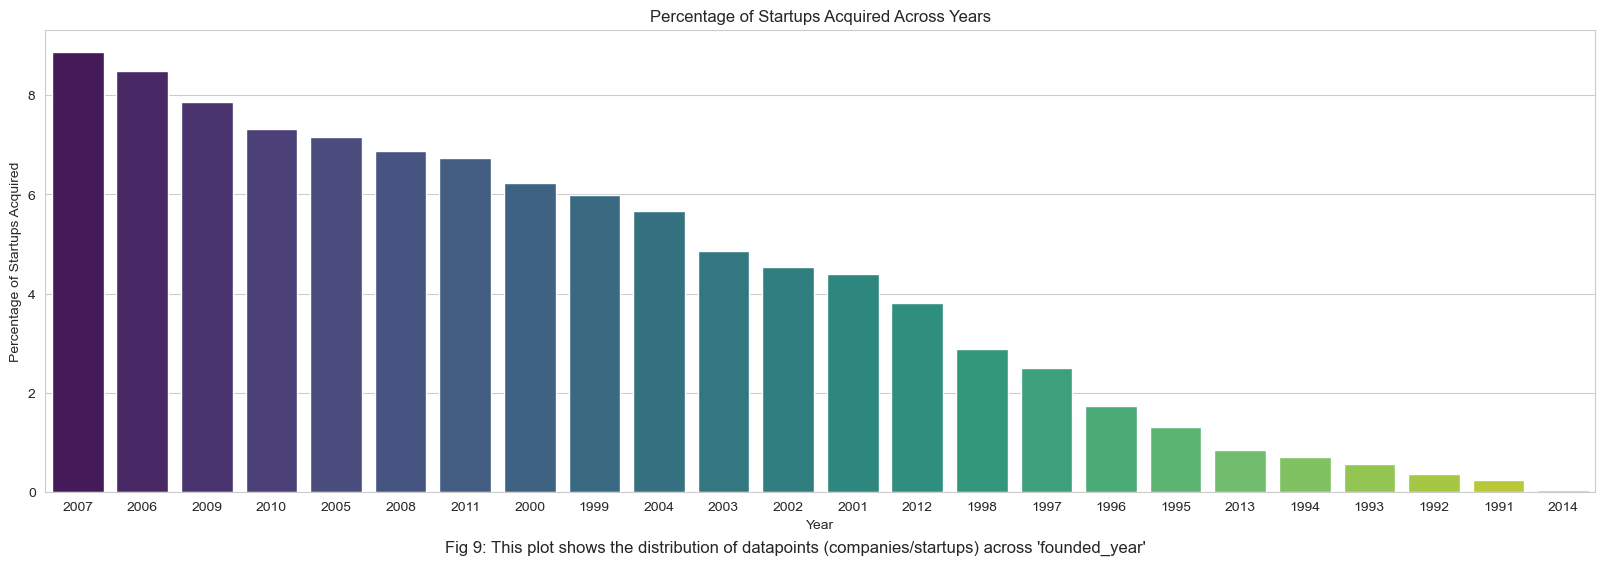

In [62]:
#Get percentage of startups in each year that are acquired and plot it
df['founded_year'] = df['founded_year'].astype(str).str.split('-').str[0]
df_temp = df_temp[df_temp['founded_year'] != 'NaT']
df_temp = df[df['founded_year'] > '1990']
df_temp = df_temp[df_temp['status'] == 'acquired']
df_temp = df_temp['founded_year'].value_counts(normalize=True) * 100
plt.figure(figsize=(20, 6))
sns.barplot(x=df_temp.index, y=df_temp.values, palette="viridis")
plt.title('Percentage of Startups Acquired Across Years')
plt.ylabel('Percentage of Startups Acquired')
plt.xlabel('Year')
plt.figtext(0.5, 0.01, "Fig 9: This plot shows the distribution of datapoints (companies/startups) across 'founded_year'", wrap=True, horizontalalignment='center', fontsize=12)
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Percentage_Of_Startus_Acquired_Across_Years.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

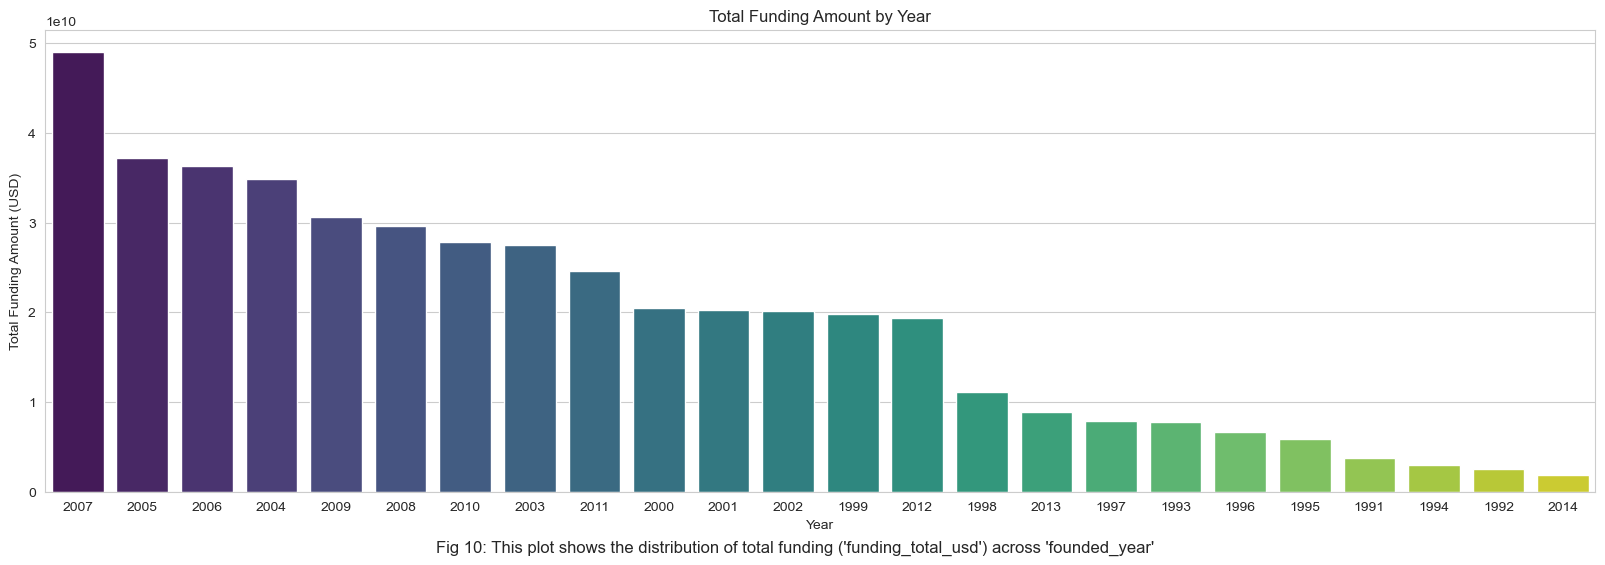

In [63]:
df['founded_year'] = df['founded_year'].astype(str).str.split('-').str[0]
df_temp = df[df['founded_year'] != 'NaT']
df_temp = df_temp[df_temp['founded_year'] > '1990']
df_temp = df_temp.groupby('founded_year')['funding_total_usd'].sum().reset_index()  # Resetting index to convert the groupby object to a dataframe
df_temp = df_temp.sort_values(by='funding_total_usd', ascending=False)  # Sorting the dataframe by 'funding_total_usd' column in descending order

plt.figure(figsize=(20, 6))
sns.barplot(x='founded_year', y='funding_total_usd', data=df_temp, palette="viridis")
plt.title('Total Funding Amount by Year')
plt.ylabel('Total Funding Amount (USD)')
plt.xlabel('Year')
plt.figtext(0.5, 0.01, "Fig 10: This plot shows the distribution of total funding ('funding_total_usd') across 'founded_year'", wrap=True, horizontalalignment='center', fontsize=12)
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Total_Funding_Amount_by_year.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

# Feature Engineering

In [64]:
#Create a new column for the difference between first funding and last funding
df['diff_funding_time'] = df['last_funding_at'] - df['first_funding_at']
df['diff_funding_time'].describe()

count                          37557
mean     355 days 00:17:35.930984900
std      656 days 20:15:14.659070848
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                485 days 00:00:00
max              10052 days 00:00:00
Name: diff_funding_time, dtype: object

In [65]:
#Create a new column for the difference between first funding and last funding in months
df['diff_funding_months'] = (df['last_funding_at'] - df['first_funding_at'])/np.timedelta64(1, 'M')
df['diff_funding_months'].describe()

count    37557.000000
mean        11.452007
std         21.188514
min          0.000000
25%          0.000000
50%          0.000000
75%         15.645161
max        324.258065
Name: diff_funding_months, dtype: float64

In [66]:
df['diff_first_funding_months'] = (df['first_funding_at'] - df['founded_at'])/np.timedelta64(1, 'M')
df['diff_first_funding_months'].describe()
#negative values shows that there is a founded date but there is no first funding date. 

count    37557.000000
mean        42.322057
std         82.111296
min       -565.677419
25%          4.870968
50%         17.483871
75%         47.548387
max       1327.709677
Name: diff_first_funding_months, dtype: float64

In [67]:
df.isnull().mean().sort_values(ascending=False)

state_code                   0.354924
city                         0.089370
region                       0.078162
country_code                 0.078162
homepage_url                 0.055959
market                       0.047946
category_list                0.047813
first_funding_at             0.000160
diff_first_funding_months    0.000160
diff_funding_time            0.000160
diff_funding_months          0.000160
last_funding_at              0.000053
round_C                      0.000000
post_ipo_debt                0.000000
secondary_market             0.000000
product_crowdfunding         0.000000
round_A                      0.000000
round_B                      0.000000
round_G                      0.000000
round_D                      0.000000
round_E                      0.000000
round_F                      0.000000
private_equity               0.000000
round_H                      0.000000
post_ipo_equity              0.000000
permalink                    0.000000
grant       

### Credit to Prianka Ball for Industry Group Code

In [68]:
# grouping markets in industries to decrease the number of segments. The list was being taken from here https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [69]:
#Making new column called  Industry group
import re
df['Industry_Group'] = np.where(df['market'].str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               np.where(df['market'].str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               np.where(df['market'].str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               np.where(df['market'].str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               np.where(df['market'].str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               np.where(df['market'].str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               np.where(df['market'].str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               np.where(df['market'].str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               np.where(df['market'].str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               np.where(df['market'].str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               np.where(df['market'].str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               np.where(df['market'].str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               np.where(df['market'].str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               np.where(df['market'].str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               np.where(df['market'].str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               np.where(df['market'].str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               np.where(df['market'].str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               np.where(df['market'].str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               np.where(df['market'].str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               np.where(df['market'].str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               np.where(df['market'].str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               np.where(df['market'].str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               np.where(df['market'].str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               np.where(df['market'].str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               np.where(df['market'].str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               np.where(df['market'].str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               np.where(df['market'].str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               np.where(df['market'].str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               np.where(df['market'].str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               np.where(df['market'].str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               np.where(df['market'].str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               np.where(df['market'].str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               np.where(df['market'].str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               np.where(df['market'].str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               np.where(df['market'].str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               np.where(df['market'].str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               np.where(df['market'].str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               np.where(df['market'].str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               np.where(df['market'].str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               np.where(df['market'].str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               np.where(df['market'].str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               np.where(df['market'].str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               np.where(df['market'].str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               np.where(df['market'].str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               np.where(df['market'].str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               np.where(df['market'].str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               np.where(df['market'].str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/var/folders/hm/gwkt1zq95psfbbj_fqjk1q240000gn/T/ipykernel_89341/2253933515.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df['market'].str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
/var/folders/hm/gwkt1zq95psfbbj_fqjk1q240000gn/T/ipykernel_89341/2253933515.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df['market'].str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
/var/folders/hm/gwkt1zq95psfbbj_fqjk1q240000gn/T/ipykernel_89341/2253933515.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df['market'].str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/hm/gwkt1zq95psfbbj_fqjk1q240000gn/T/ipykernel_89341/225393351

In [70]:
df['Industry_Group'].unique() #Industry groups unique values

array(['Content and Publishing', 'Consumer Electronics',
       'Travel and Tourism', 'Internet Services', 'Software',
       'Commerce and Shopping', 'Health Care', 'Real Estate', 'Education',
       'Food and Beverage', 'Media and Entertainment',
       'Data and Analytics', 'Clothing and Apparel', 'Mobile', 'Other',
       'Biotechnology', 'Community and Lifestyle', 'Sports',
       'Advertising', 'Administrative Services', 'Manufacturing',
       'Gaming', 'Financial Services', 'Messaging and Telecommunication',
       'Information Technology', 'Sales and Marketing',
       'Professional Services', 'Navigation and Mapping',
       'Transportation', 'Hardware', 'Privacy and Security', 'Design',
       'Platforms', 'Consumer Goods', 'Events', 'Energy',
       'Natural Resources', 'Government and Military',
       'Agriculture and Farming', 'Science and Engineering', 'Apps',
       'Sustainability', 'Artificial Intelligence'], dtype=object)

In [71]:
df['Industry_Group'].nunique()

43

In [72]:
df.groupby(by = ['Industry_Group'])['permalink'].count().sort_values(ascending = False)

Industry_Group
Software                           7218
Internet Services                  2459
Biotechnology                      2445
Health Care                        2359
Commerce and Shopping              2150
Administrative Services            1938
Mobile                             1670
Community and Lifestyle            1608
Information Technology             1557
Advertising                        1379
Media and Entertainment            1215
Financial Services                 1112
Gaming                             1061
Professional Services               871
Data and Analytics                  868
Education                           827
Content and Publishing              762
Other                               760
Manufacturing                       539
Real Estate                         532
Sales and Marketing                 504
Privacy and Security                462
Transportation                      436
Travel and Tourism                  387
Hardware                 

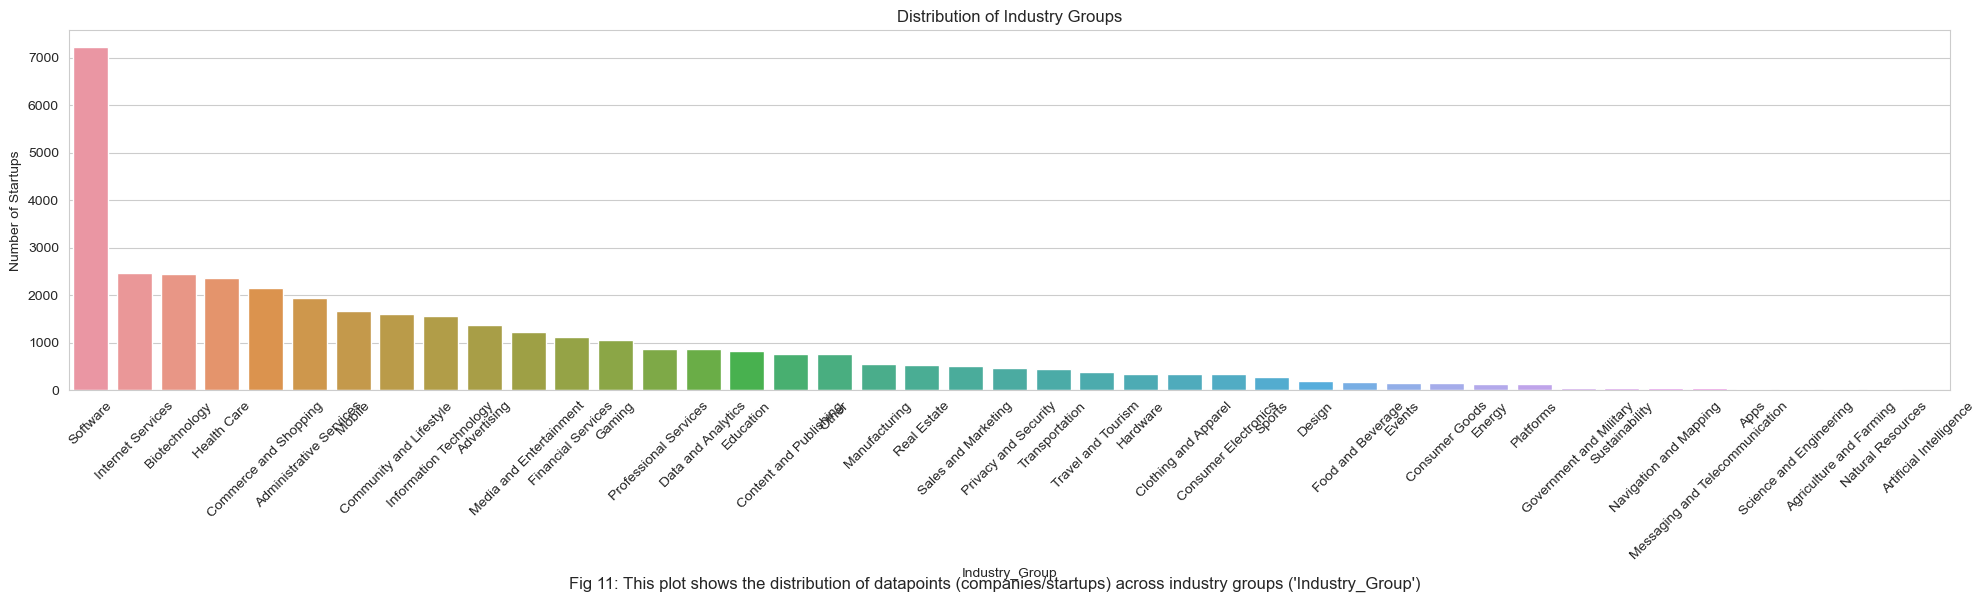

In [80]:
#Histogram of Industry Groups
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Industry_Group', order=df['Industry_Group'].value_counts().index)
plt.title("Distribution of Industry Groups")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.figtext(0.5, 0.01, "Fig 11: This plot shows the distribution of datapoints (companies/startups) across industry groups ('Industry_Group')", wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Distribution_of_Industry_Groups.png')
plt.savefig(plot_filename)
plt.show()
plt.close()


## Dropping columns & correlation matrix

In [75]:
#Drop market column
df = df.drop(columns=['market'])

In [76]:
#Drop permalink, name, homepage_url, category_list, city, state_code, founded_at, founded_month, founded_year, 'first_funding_at', 'last_funding_at', founded_quarter
df = df.drop(columns=['permalink', 'name', 'homepage_url', 'category_list', 'city', 'state_code', 'founded_at', 'founded_month', 'founded_year', 'first_funding_at', 'last_funding_at', 'founded_quarter'])

In [77]:
#Print the colunb names
df.columns

Index(['funding_total_usd', 'status', 'country_code', 'region',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_time', 'diff_funding_months', 'diff_first_funding_months',
       'Industry_Group'],
      dtype='object')

In [78]:
categorical_cols = ['region', 'country_code','Industry_Group', 'status']
numerical_cols = [col for col in df.columns if col not in categorical_cols]


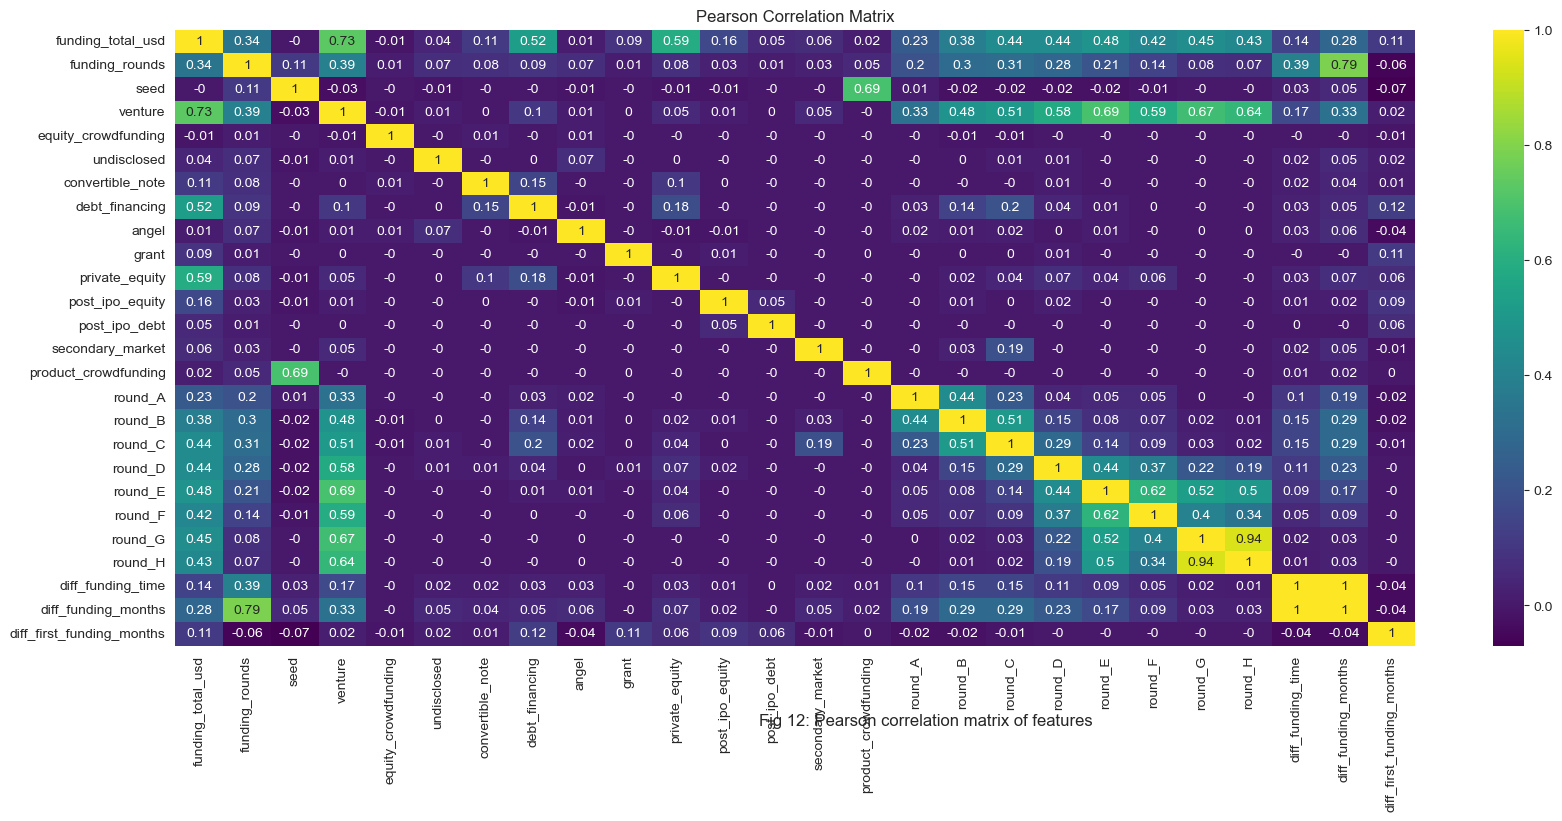

In [84]:
#Create and plot pearson coorelation matrix of the numerical columns using a random sample of 10000 rows
#Display the correlation value up to 2 decimal places
corr = df[numerical_cols].sample(10000).corr()
corr = corr.round(2)
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Pearson Correlation Matrix')
plt.figtext(0.5, 0.01, "Fig 12: Pearson correlation matrix of features", wrap=True, horizontalalignment='center', fontsize=12)
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Correlation_Matrix.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

In [85]:
df = df.drop(columns=['diff_funding_time','round_H', 'post_ipo_debt'])
df.columns

Index(['funding_total_usd', 'status', 'country_code', 'region',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'secondary_market',
       'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D',
       'round_E', 'round_F', 'round_G', 'diff_funding_months',
       'diff_first_funding_months', 'Industry_Group'],
      dtype='object')

In [86]:
#Display percentage of null values in each column
df.isnull().mean().sort_values(ascending=False)

country_code                 0.078162
region                       0.078162
diff_first_funding_months    0.000160
diff_funding_months          0.000160
funding_total_usd            0.000000
secondary_market             0.000000
round_G                      0.000000
round_F                      0.000000
round_E                      0.000000
round_D                      0.000000
round_C                      0.000000
round_B                      0.000000
round_A                      0.000000
product_crowdfunding         0.000000
private_equity               0.000000
post_ipo_equity              0.000000
status                       0.000000
grant                        0.000000
angel                        0.000000
debt_financing               0.000000
convertible_note             0.000000
undisclosed                  0.000000
equity_crowdfunding          0.000000
venture                      0.000000
seed                         0.000000
funding_rounds               0.000000
Industry_Gro

In [87]:
#Print the number of unique values in each of the categorical columns respectively
print(df['country_code'].nunique())
print(df['region'].nunique())
print(df['Industry_Group'].nunique())

110
1003
43


In [88]:
#Print the counts of each of the unique values in 'region' in descending order limit results to 50
df['region'].value_counts().head(50)

region
SF Bay Area         5693
New York City       2210
Boston              1455
London              1276
Los Angeles         1142
Seattle              757
Washington, D.C.     633
Chicago              616
Austin               515
San Diego            512
Denver               509
Tel Aviv             453
Atlanta              424
Paris                405
Toronto              400
Newark               366
Dallas               349
Philadelphia         304
Berlin               297
Salt Lake City       286
Anaheim              280
Beijing              275
Raleigh              256
Minneapolis          253
Singapore            248
Hartford             227
Phoenix              218
Portland, Oregon     217
Vancouver            204
Seoul                200
Houston              198
Dublin               192
Bangalore            191
Pittsburgh           182
GBR - Other          178
Baltimore            176
Detroit              175
Tokyo                174
Nashville            173
Santiago          

In [89]:
#Set the region to 'other' if the count of the region is less than 100
df['region'] = np.where(df['region'].isin(df['region'].value_counts()[df['region'].value_counts() < 100].index), 'other', df['region'])

In [90]:
#Print the counts of each of the unique values in 'country_code' in descending order limit results to 50
df['country_code'].value_counts()

country_code
USA    23182
GBR     1968
CAN     1074
DEU      722
FRA      669
       ...  
MCO        1
BRN        1
ECU        1
NIC        1
LAO        1
Name: count, Length: 110, dtype: int64

In [91]:
#Set the country_code to 'other' if the count of the country_code is less than 300
df['country_code'] = np.where(df['country_code'].isin(df['country_code'].value_counts()[df['country_code'].value_counts() < 300].index), 'other', df['country_code'])

In [92]:
#Print number of unique values in each of the categorical columns respectively
print(df['country_code'].nunique())
print(df['region'].nunique())
print(df['Industry_Group'].nunique())
print(df['status'].nunique())

10
65
43
3


In [93]:
#Print number of datapoints with missing values
df.isnull().sum().sum()

5884

In [94]:
#Print the number of values where diff_first_funding_months or diff_funding_months is none
print(df['diff_first_funding_months'].isnull().sum())
print(df['diff_funding_months'].isnull().sum())

6
6


In [95]:
#Drop any values where diff_first_funding_months or diff_funding_months is none
df = df.dropna(subset=['diff_first_funding_months', 'diff_funding_months'])

# Preprocessing and Splitting

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Define features and target variable
X = df.drop(columns=['status'])
y = df['status']

# Split the data into other and test sets using stratified split
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Use KFold to split the other set into train and validation sets for each fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X_other, y_other):
    X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]
    
    # Train your model on X_train and y_train, and evaluate it on X_val and y_val
    # Repeat this process for each fold

# Check the shape of the training and test sets
X_train.shape, X_test.shape, X_val.shape

#Print the counts of each of the unique values in y
y_test.value_counts()

status
operating    6519
acquired      594
closed        399
Name: count, dtype: int64

In [97]:
# Checking for missing values in the original training data
missing_percentage_train = X_train.isnull().mean().sort_values(ascending=False)

# Calculate some statistics about the missing values
total_data_points = X_train.shape[0]
data_points_with_missing_values = X_train.isnull().any(axis=1).sum()
fraction_data_points_with_missing_values = data_points_with_missing_values / total_data_points
total_features = X_train.shape[1]
features_with_missing_values = X_train.isnull().any().sum()
fraction_features_with_missing_values = features_with_missing_values / total_features

missing_stats = {
    "Total Data Points": total_data_points,
    "Data Points with Missing Values": data_points_with_missing_values,
    "Fraction of Data Points with Missing Values": fraction_data_points_with_missing_values,
    "Total Features": total_features,
    "Features with Missing Values": features_with_missing_values,
    "Fraction of Features with Missing Values": fraction_features_with_missing_values
}

missing_stats

{'Total Data Points': 24036,
 'Data Points with Missing Values': 1865,
 'Fraction of Data Points with Missing Values': 0.07759194541521051,
 'Total Features': 26,
 'Features with Missing Values': 2,
 'Fraction of Features with Missing Values': 0.07692307692307693}

# Training models

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
import joblib
import os
from sklearn.preprocessing import LabelEncoder

os.makedirs('results', exist_ok=True)

# Define numerical and categorical columns
categorical_cols = ['region', 'country_code','Industry_Group']
#Numerical are all columns except categorical columns and the target variable
numerical_cols = [col for col in df.columns if col not in categorical_cols]
numerical_cols.remove('status')

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

# Bundle transformers into preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
# function for the ML pipeline as outlined above 


def MLpipe_KFold_F1(X, y, preprocessor, ML_algo, param_grid, save_dir='results'):
    '''
    Modified to focus on the performance on minority classes 0 and 1.
    '''
    
    random_states = [42, 43, 44, 45, 46]

    test_scores = []
    best_models = []

    # Encoding categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Computing class weights for encoded labels
    class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
    weights = {i: class_weights[i] for i in range(len(class_weights))}

    # Custom scorer that emphasizes minority classes (You need to adjust the labels parameter based on the encoding)
    minority_classes = label_encoder.transform(['closed', 'acquired'])  # replace with your minority classes
    def custom_f1_scorer(y_true, y_pred):
        scores = f1_score(y_true, y_pred, average=None, labels=minority_classes)
        return np.mean(scores)  # Averaging the scores

    f1_scorer = make_scorer(custom_f1_scorer)


    for random_state in random_states:
        X_other, X_test, y_other, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=random_state, stratify=y_encoded)
        
        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
        
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', ML_algo)])
        
        # Assuming the ML algorithm supports class_weight
        if 'class_weight' in ML_algo.get_params().keys():
            param_grid = {**param_grid, 'classifier__class_weight': [weights]}

        grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=skf, scoring=f1_scorer, 
                                   return_train_score=True, n_jobs=6, verbose=True)
        
        grid_search.fit(X_other, y_other)
        
        best_model = grid_search.best_estimator_, grid_search.best_params_

        model_save_path = os.path.join(save_dir, f'best_model_{ML_algo.__class__.__name__}_{random_state}_f1_custom.joblib')
        joblib.dump(best_model[0], model_save_path)
        
        y_test_pred = best_model[0].predict(X_test)
        test_score = custom_f1_scorer(y_test, y_test_pred)
        
        test_scores.append(test_score)
        best_models.append(best_model[1])
        
        print(f"Best Model: {best_model[1]}")
        print(f"Best F1 Score: {test_score}")
        
    return test_scores, best_models

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def test_different_models(X, y, preprocessor):
    # Define the models and their corresponding parameter grids
    models_param_grid = [
        {
            'model': LogisticRegression(max_iter = 10000),
            'param_grid': {'classifier__C': [0.01, 0.1, 1, 10, 100],
                            'classifier__solver': ['liblinear', 'lbfgs']}
        },
        {
            'model': RandomForestClassifier(),
            'param_grid': {'classifier__n_estimators': [100],
                           'classifier__max_depth': [1, 3, 5, 10, 20, 30, 50, 100, 200, None]}
        },
        {
            'model': SVC(),
            'param_grid': {'classifier__C': [0.1, 1, 10, 100],
                           'classifier__gamma': ['scale', 'auto']}
        },
        {
            'model': KNeighborsClassifier(),
            'param_grid': {'classifier__n_neighbors': [3, 5, 7, 9, 12, 15, 20, 40, 80],
                           'classifier__weights': ['uniform', 'distance']}
        }
    ]

    # Results dictionary
    results = {}

    # Test each model
    for model_info in models_param_grid:
        model = model_info['model']
        param_grid = model_info['param_grid']
        model_name = model.__class__.__name__

        # Run the ML pipeline for F1 score
        test_scores, best_models = MLpipe_KFold_F1(X, y, preprocessor, model, param_grid)
        mean_test_score = np.mean(test_scores)
        std_test_score = np.std(test_scores)

        # Store results
        results[model_name] = {
            'mean_test_score': mean_test_score,
            'std_test_score': std_test_score,
            'best_models': best_models
        }

        # Print results for each model
        print(f"{model_name}: Mean Test F1 Score = {mean_test_score}, Standard Deviation = {std_test_score}")

    return results

In [114]:
results = test_different_models(X, y, preprocessor)
results

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 0.1, 'classifier__class_weight': {0: 4.215151515151515, 1: 6.275187969924812, 2: 0.38411266568483066}, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.19137464660858775
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 0.1, 'classifier__class_weight': {0: 4.215151515151515, 1: 6.275187969924812, 2: 0.38411266568483066}, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.1989777437551669
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 0.01, 'classifier__class_weight': {0: 4.215151515151515, 1: 6.275187969924812, 2: 0.38411266568483066}, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.20290556038999474
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 0.01, 'classifier__class_weight': {0: 4.215151515151515, 1: 6.275187969924812, 2: 0.38411266568483066}, 'classifier__solver': 'lb

{'LogisticRegression': {'mean_test_score': 0.2027978454343958,
  'std_test_score': 0.007207080821328572,
  'best_models': [{'classifier__C': 0.1,
    'classifier__class_weight': {0: 4.215151515151515,
     1: 6.275187969924812,
     2: 0.38411266568483066},
    'classifier__solver': 'lbfgs'},
   {'classifier__C': 0.1,
    'classifier__class_weight': {0: 4.215151515151515,
     1: 6.275187969924812,
     2: 0.38411266568483066},
    'classifier__solver': 'lbfgs'},
   {'classifier__C': 0.01,
    'classifier__class_weight': {0: 4.215151515151515,
     1: 6.275187969924812,
     2: 0.38411266568483066},
    'classifier__solver': 'lbfgs'},
   {'classifier__C': 0.01,
    'classifier__class_weight': {0: 4.215151515151515,
     1: 6.275187969924812,
     2: 0.38411266568483066},
    'classifier__solver': 'lbfgs'},
   {'classifier__C': 0.01,
    'classifier__class_weight': {0: 4.215151515151515,
     1: 6.275187969924812,
     2: 0.38411266568483066},
    'classifier__solver': 'lbfgs'}]},
 'Ran

# Analysis

### Baseline Score

In [137]:
company_status_distribution = {
    "operating": 86.9,
    "acquired": 7.7,
    "closed": 5.4
}

# Naive model probabilities for each class
naive_model_probabilities = {
    "operating": 1 / 3,  # Equal probability for each class
    "acquired": 1 / 3,
    "closed": 1 / 3
}

# Calculate the F1 scores for naive model
# F1 score is defined as 2 * (precision * recall) / (precision + recall)
# For a naive model, precision and recall are equal to the probability of predicting the class correctly

f1_score_acquired_naive = 2 * (naive_model_probabilities["acquired"] * (company_status_distribution["acquired"] / 100)) / (naive_model_probabilities["acquired"] + (company_status_distribution["acquired"] / 100))
f1_score_closed_naive = 2 * (naive_model_probabilities["closed"] * (company_status_distribution["closed"] / 100)) / (naive_model_probabilities["closed"] + (company_status_distribution["closed"] / 100))

# Custom scoring metric for naive model: average of F1 scores for acquired and closed
baseline_score = (f1_score_acquired_naive + f1_score_closed_naive) / 2
baseline_score

0.10902237241876872

### Model Comparison

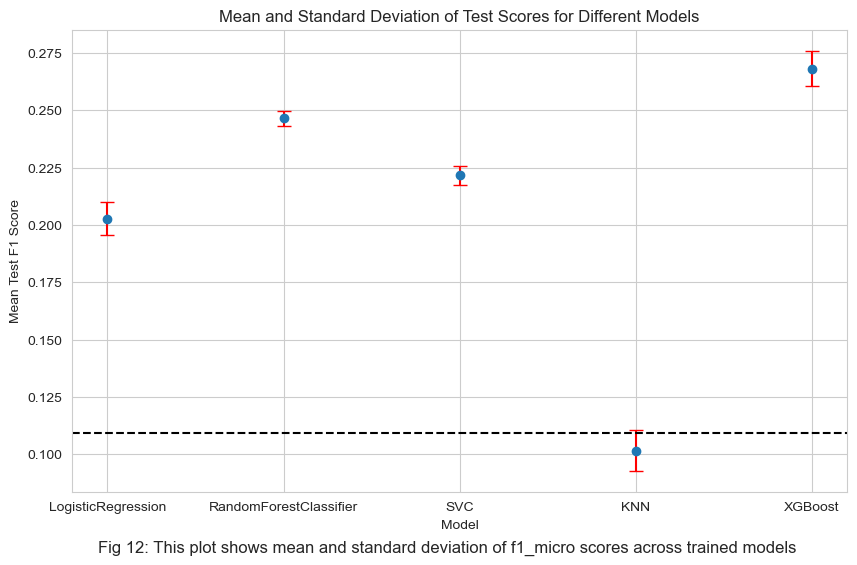

In [138]:

# Model scores and standard deviations
models = ["LogisticRegression", "RandomForestClassifier", "SVC", "KNN", "XGBoost"]

means = []
std_devs = []

for result in results:
    means += [results[result]['mean_test_score']]
    std_devs += [results[result]['std_test_score']]

means += [0.26825261700309916]
std_devs += [0.007784698728824507]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(models, means, yerr=std_devs, fmt='o', ecolor='red', capsize=5)
# plot a line at the baseline score
plt.axhline(y=baseline_score, color='black', linestyle='--')
plt.title('Mean and Standard Deviation of Test Scores for Different Models')
plt.ylabel('Mean Test F1 Score')
plt.xlabel('Model')
plt.figtext(0.5, 0.01, "Fig 12: This plot shows mean and standard deviation of f1_micro scores across trained models", wrap=True, horizontalalignment='center', fontsize=12)
plt.grid(True)
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'Model_Metrics.png')
plt.savefig(plot_filename)
plt.show()
plt.close()


### Confusion Matrices

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
import shap
knn_model = joblib.load('results/best_model_KNeighborsClassifier_42_f1_custom.joblib')
log_reg_model = joblib.load('results/best_model_LogisticRegression_42_f1_custom.joblib')
svc_model = joblib.load('results/best_model_SVC_42_f1_custom.joblib')
rf_model = joblib.load('results/best_model_RandomForestClassifier_42_f1_custom.joblib')
from sklearn.inspection import permutation_importance

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_other, X_test, y_other, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


def plot_conf_matrix(model, X_test, y_test, model_name, fig_num):
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Confusion Matrix for {model_name}')
    plots_dir = 'figures'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)

    # Save the plot
    plot_filename = os.path.join(plots_dir, f'Confusion_matrix_{model_name}_f1_custom.png')
    plt.savefig(plot_filename)
    plt.figtext(0.5, 0.01, f"Fig {fig_num}: Confusion Matrix for {model_name}", wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    plt.close()
    #Save plots with at least 300 dpi
    plt.savefig(f'confusion_matrix_{model_name}.png', dpi=300)

def plot_permutation_importance(model, X_test, y_test, feature_names, model_name, fig_num):
    # Compute the permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Sort the features by their importance scores
    sorted_idx = result.importances_mean.argsort()

    # Plot the results
    plt.figure(figsize=(10, len(sorted_idx) * 0.3))  # Adjust the figure size based on the number of features
    plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
    
    plt.title(f"Permutation Importances (test set) - {model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.figtext(0.5, 0.01, f"Fig {fig_num}: Permutation importance for {model_name}", wrap=True, horizontalalignment='center', fontsize=12)
    plots_dir = 'figures'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)

    # Save the plot
    plot_filename = os.path.join(plots_dir, f'permutation_importance_{model_name}_f1_custom.png')
    plt.savefig(plot_filename)
    plt.show()
    plt.close()
    #Save plots with at least 300 dpi
    plt.savefig(f'permutation_importance_{model_name}.png', dpi=300)

def plot_shap_values(pipeline, X_train_raw):
    # Extract the classifier from the pipeline
    classifier = pipeline.named_steps['classifier']

    # Preprocess the data: transform X_train_raw using the pipeline's preprocessing steps
    X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train_raw)

    # Initialize SHAP explainer with the classifier
    if isinstance(classifier, RandomForestClassifier):
        explainer = shap.TreeExplainer(classifier)
    else:
        explainer = shap.KernelExplainer(classifier.predict, shap.sample(X_train_transformed, 100))

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_train_transformed)

    # Plot the SHAP values
    shap.summary_plot(shap_values, X_train_transformed, plot_type="bar")


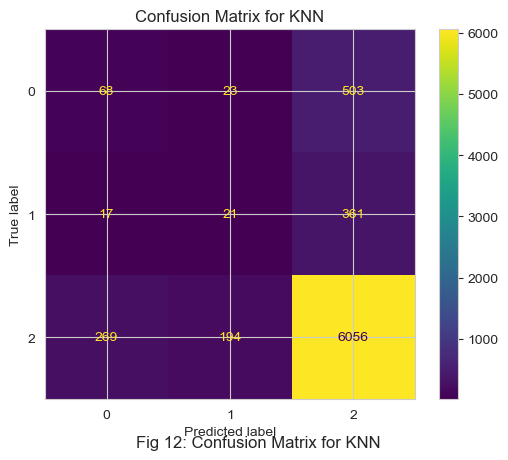

<Figure size 640x480 with 0 Axes>

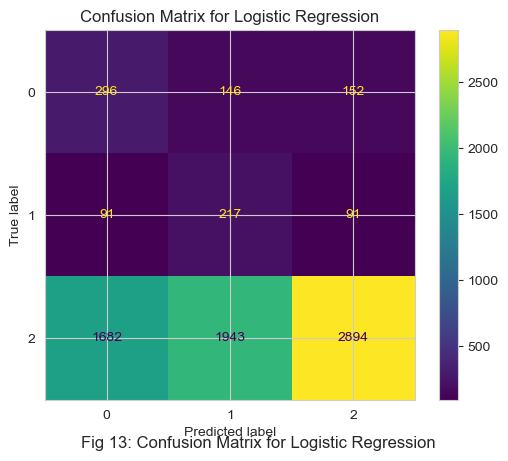

<Figure size 640x480 with 0 Axes>

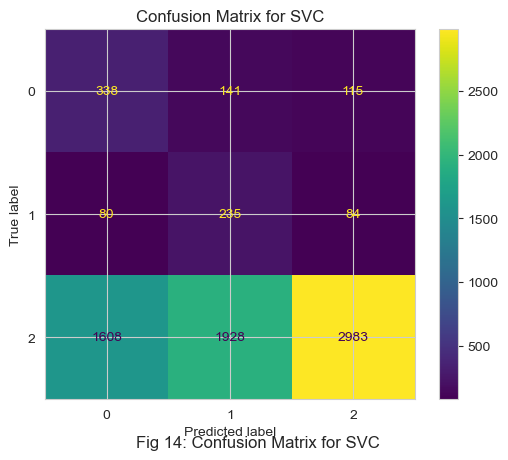

<Figure size 640x480 with 0 Axes>

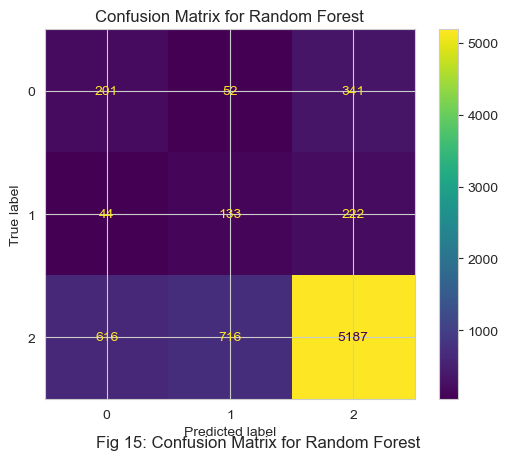

<Figure size 640x480 with 0 Axes>

In [119]:

plot_conf_matrix(knn_model, X_test, y_test, 'KNN', '12')
plot_conf_matrix(log_reg_model, X_test, y_test, 'Logistic Regression', '13')
plot_conf_matrix(svc_model, X_test, y_test, 'SVC', '14')
plot_conf_matrix(rf_model, X_test, y_test,  'Random Forest', '15')


### Global Feature Importance

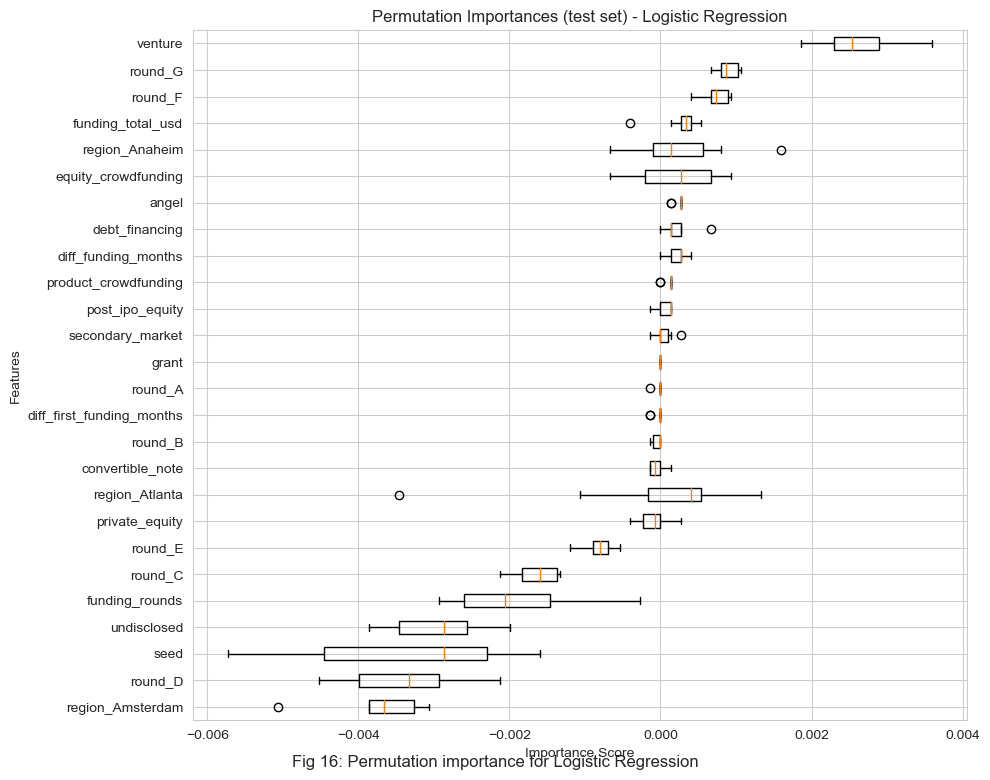

<Figure size 640x480 with 0 Axes>

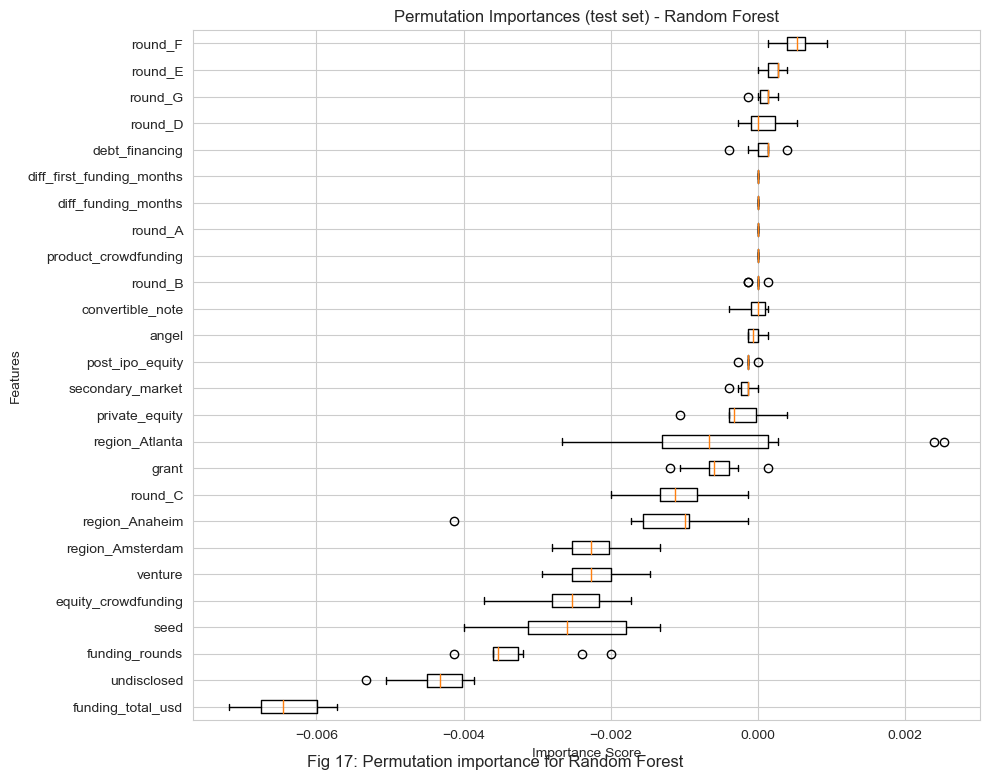

<Figure size 640x480 with 0 Axes>

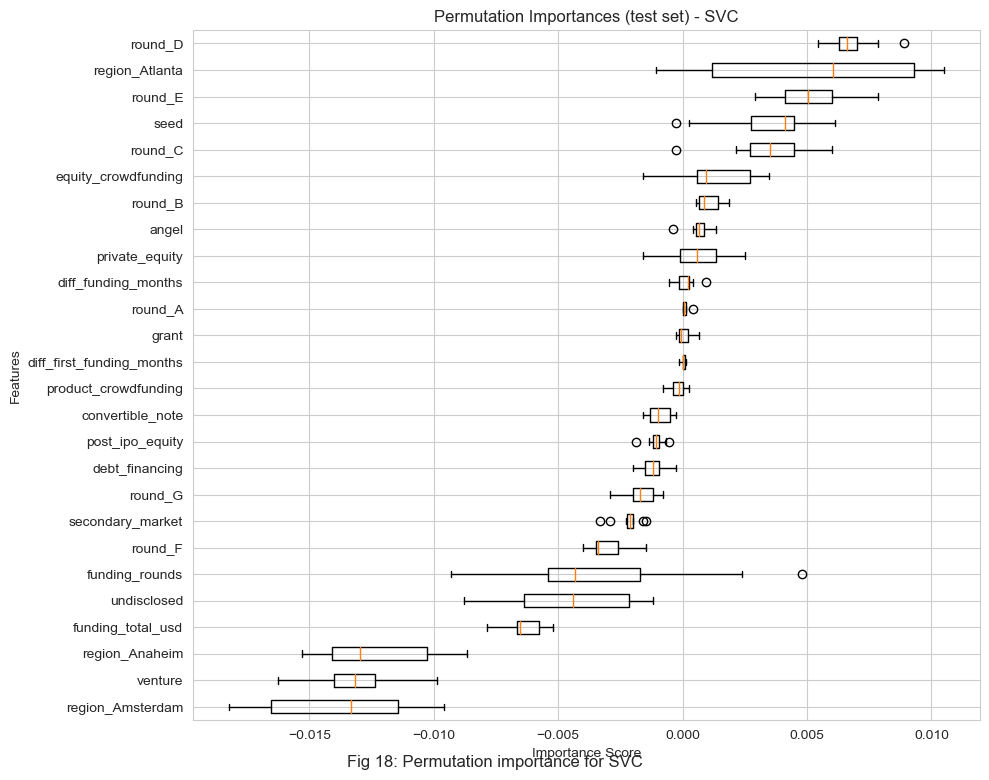

<Figure size 640x480 with 0 Axes>

In [109]:
preprocessor.fit(X)

# Get the feature names for the categorical columns after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)

# Combine with numerical column names
all_feature_names = np.concatenate((numerical_cols, cat_feature_names))

plot_permutation_importance(log_reg_model, X_test, y_test, all_feature_names, 'Logistic Regression', '16')
plot_permutation_importance(rf_model, X_test, y_test, all_feature_names, 'Random Forest', '17')
plot_permutation_importance(svc_model, X_test, y_test, all_feature_names, 'SVC', '18')

### Measure of uncertainty due to splitting

In [129]:
def MLpipe_KFold_Split_Uncertainty(X, y, preprocessor, ML_algo, param_grid):
    '''
    Modified to focus on the performance on minority classes 0 and 1.
    '''
    
    random_states = [42, 43, 44]

    cv_scores = []

    # Encoding categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Computing class weights for encoded labels
    class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
    weights = {i: class_weights[i] for i in range(len(class_weights))}

    # Custom scorer that emphasizes minority classes (You need to adjust the labels parameter based on the encoding)
    minority_classes = label_encoder.transform(['closed', 'acquired'])  # replace with your minority classes
    def custom_f1_scorer(y_true, y_pred):
        scores = f1_score(y_true, y_pred, average=None, labels=minority_classes)
        return np.mean(scores)  # Averaging the scores

    f1_scorer = make_scorer(custom_f1_scorer)


    for random_state in random_states:
        X_other, X_test, y_other, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=random_state, stratify=y_encoded)
        
        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
        
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', ML_algo)])
        
        # Assuming the ML algorithm supports class_weight
        if 'class_weight' in ML_algo.get_params().keys():
            param_grid = {**param_grid, 'classifier__class_weight': [weights]}

        grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=skf, scoring=f1_scorer, 
                                   return_train_score=True, n_jobs=6, verbose=True)
        
        grid_search.fit(X_other, y_other)

        # Store the cross-validation scores
        fold_scores = grid_search.cv_results_['mean_test_score']
        cv_scores.append((np.mean(fold_scores), np.std(fold_scores)))

        
        print(f"Fold Scores: {fold_scores}")
        
    return cv_scores

In [130]:
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100],
                'classifier__solver': ['liblinear', 'lbfgs']}
cv_scores = MLpipe_KFold_Split_Uncertainty(X, y, preprocessor, LogisticRegression(max_iter = 10000), param_grid)
cv_scores

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fold Scores: [0.06110179 0.20724737 0.12080583 0.20732176 0.13861895 0.20557774
 0.14170109 0.20512612 0.14183611 0.20497616]
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fold Scores: [0.05297944 0.20337266 0.11924736 0.20354904 0.13597749 0.20149246
 0.13921573 0.20209818 0.14060362 0.20215545]
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fold Scores: [0.06052492 0.20664554 0.12198236 0.20492903 0.14021107 0.20468827
 0.14289941 0.20431796 0.14362042 0.20428198]


[(0.16343129171561976, 0.047884696467145674),
 (0.16006914350266893, 0.04852636925834136),
 (0.1634100973026173, 0.0472155773077517)]

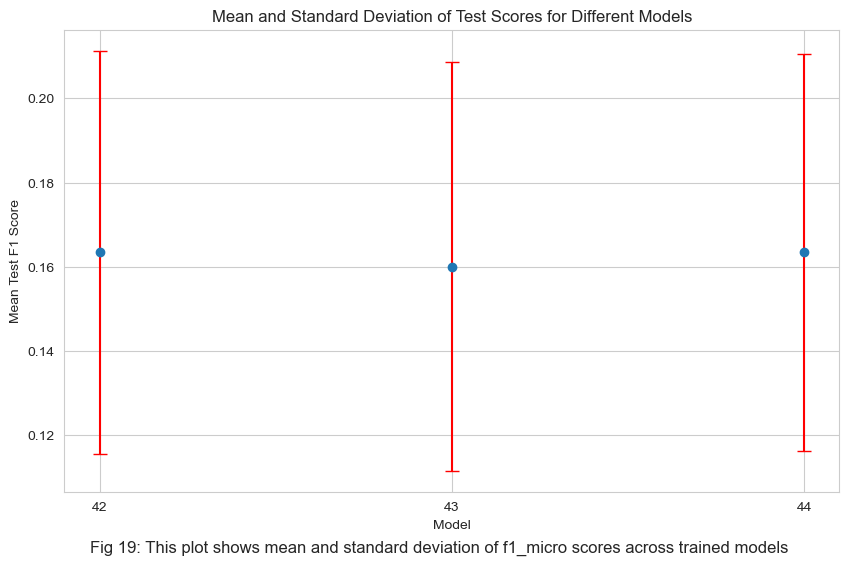

In [131]:
#Visualize the mean and std_dev of the cross validation scores
plt.figure(figsize=(10, 6))
plt.errorbar(['42', '43', '44'], [score[0] for score in cv_scores], yerr=[score[1] for score in cv_scores], fmt='o', ecolor='red', capsize=5)
plt.title('Mean and Standard Deviation of Test Scores for Different Models')
plt.ylabel('Mean Test F1 Score')
plt.xlabel('Model')
plt.figtext(0.5, 0.01, "Fig 19: This plot shows mean and standard deviation of f1_micro scores across trained models", wrap=True, horizontalalignment='center', fontsize=12)
plt.grid(True)
plots_dir = 'figures'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Save the plot
plot_filename = os.path.join(plots_dir, 'CV_Scores.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

# Previous model results
### Trained prior to custom scoring metric, inclusion of null values in country_code, and some columns that were previously dropped

In [ ]:
#test_different_models(X, y, preprocessor)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.802376234453594
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.8031815286740259
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 0.01, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.8030416644715405
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.7998186080297667
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Best F1 Score: 0.7960947890183434
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Model: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best F1 Score: 0.7956773371864939
Fitting 4 folds for each of 10 candi

{'LogisticRegression': {'mean_test_score': 0.8017939485816452,
  'std_test_score': 0.003512700170012006,
  'best_models': [{'classifier__C': 10, 'classifier__solver': 'lbfgs'},
   {'classifier__C': 10, 'classifier__solver': 'lbfgs'},
   {'classifier__C': 0.01, 'classifier__solver': 'lbfgs'},
   {'classifier__C': 1, 'classifier__solver': 'lbfgs'},
   {'classifier__C': 1, 'classifier__solver': 'lbfgs'},
   {'classifier__C': 0.1, 'classifier__solver': 'liblinear'},
   {'classifier__C': 0.1, 'classifier__solver': 'liblinear'},
   {'classifier__C': 100, 'classifier__solver': 'lbfgs'},
   {'classifier__C': 100, 'classifier__solver': 'liblinear'},
   {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}]},
 'RandomForestClassifier': {'mean_test_score': 0.8038474472856215,
  'std_test_score': 0.003732922122315228,
  'best_models': [{'classifier__max_depth': 50,
    'classifier__n_estimators': 100},
   {'classifier__max_depth': None, 'classifier__n_estimators': 100},
   {'classifier__max_depth'

## Confusion Matrices

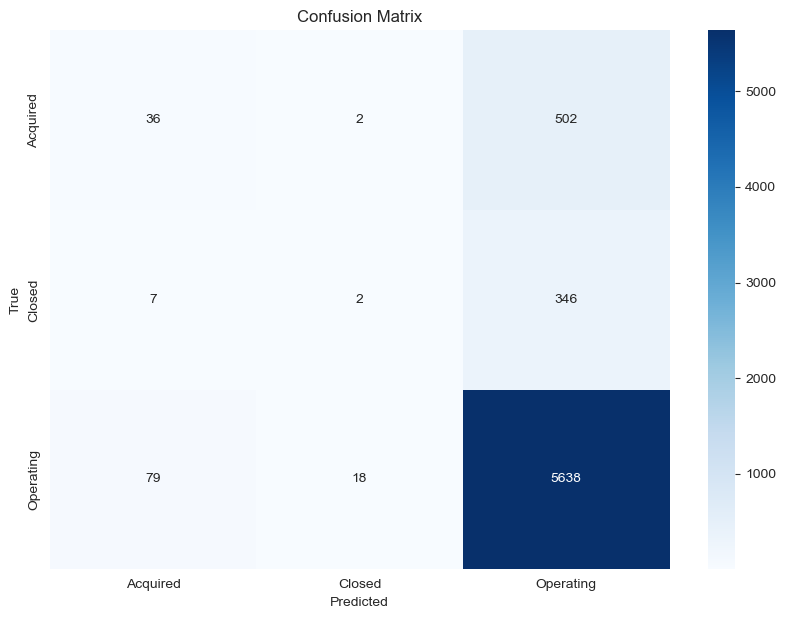

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# import joblib
# X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Replace this with the actual path to your saved model
# model_path = 'results/best_model_KNeighborsClassifier_42.joblib'

# # Load the model
# loaded_model = joblib.load(model_path)

# y_pred = loaded_model.predict(X_test)

# # Compute the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# class_names = ['Acquired', 'Closed', 'Operating']

# # Display the confusion matrix using seaborn
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()